In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [5]:
#    Question 1
percentage_of_non_fiction = 310/(310+240)*100
print(f'percentage of non fiction is {percentage_of_non_fiction}')

percentage_of_fiction = 240/(310+240)*100
print(f'percentage of fiction is {percentage_of_fiction}')

percentage of non fiction is 56.36363636363636
percentage of fiction is 43.63636363636363


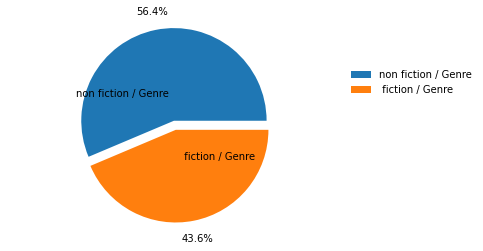

In [6]:
#Question 2
fig, ax = plt.subplots()
labels = ['non fiction / Genre', 
         ' fiction / Genre']
percentages = [56.36, 43.64]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=.3)
ax.axis('equal')


ax.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()

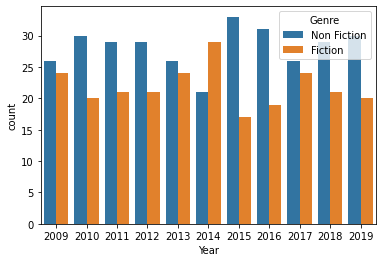

In [7]:
#question 3
sns.countplot (x = df['Year'], hue = df.Genre, data = df)
plt.show()
#maximum for fiction was in 2014 while non fiction was in 2015
#minimun for fiction was in 2015 while non fiction was 2014

Text(37, 0.056, 'Price of non fiction books')

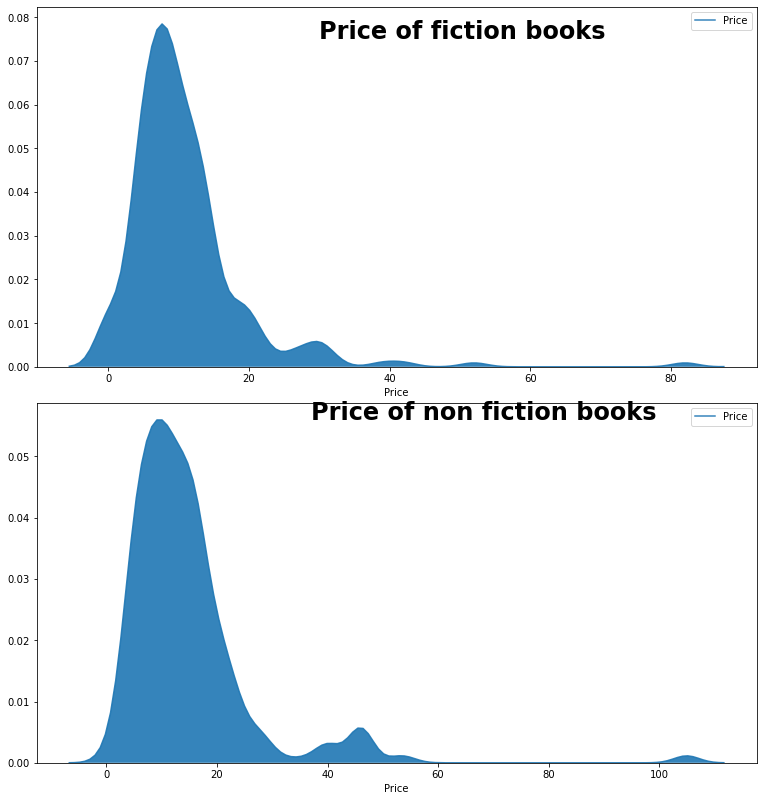

In [8]:
#Question 4
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.1,1,1])
sns.kdeplot(df[df['Genre']=='Fiction']['Price'],shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df[df['Genre']=='Non Fiction']['Price'],shade=True, alpha=0.9, ax=axes2)
axes1.set_xlabel('Price', fontsize=10, color='black')
axes2.set_xlabel('Price', fontsize=10, color='black')
axes1.set_ylabel('')
axes2.set_ylabel('')
axes1.text(30, 0.075, 'Price of fiction books', fontsize=24, color='black', fontweight='bold')
axes2.text(37, 0.056, 'Price of non fiction books', fontsize=24, color='black', fontweight='bold')

<BarContainer object of 11 artists>

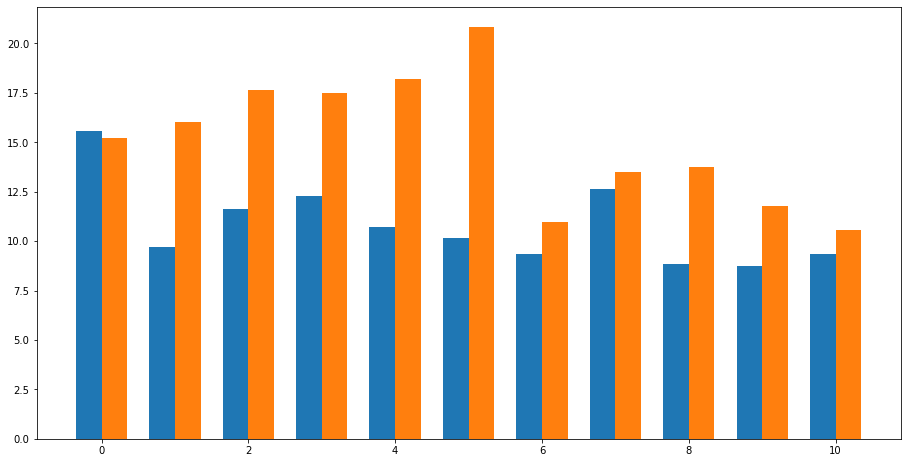

In [9]:
#Question 5
mean_price_fiction_books = []
for year in range(2009,2020):
    mean = df[df['Genre']=='Fiction'][df[df['Genre']=='Fiction']['Year']==year]['Price'].mean()
    mean_price_fiction_books.append(mean)
mean_price_non_fiction_books = []
for year in range(2009,2020):
    mean = df[df['Genre']=='Non Fiction'][df[df['Genre']=='Non Fiction']['Year']==year]['Price'].mean()
    mean_price_non_fiction_books.append(mean)
    

years = range(2009,2020, 1)


mean_price_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_fiction_books})
mean_price_non_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_non_fiction_books})
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])


x = np.arange(len(years))
width = 0.35


axes.bar(x - width/2, height=mean_price_fiction_books_df['Mean_price'],width=width)
axes.bar(x + width/2, height=mean_price_non_fiction_books_df['Mean_price'], width=width)
#mean prices of fiction and non fiction

In [10]:
df[df['Genre']=='Non Fiction'][df[df['Genre']=='Non Fiction']['Price']==105 ]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


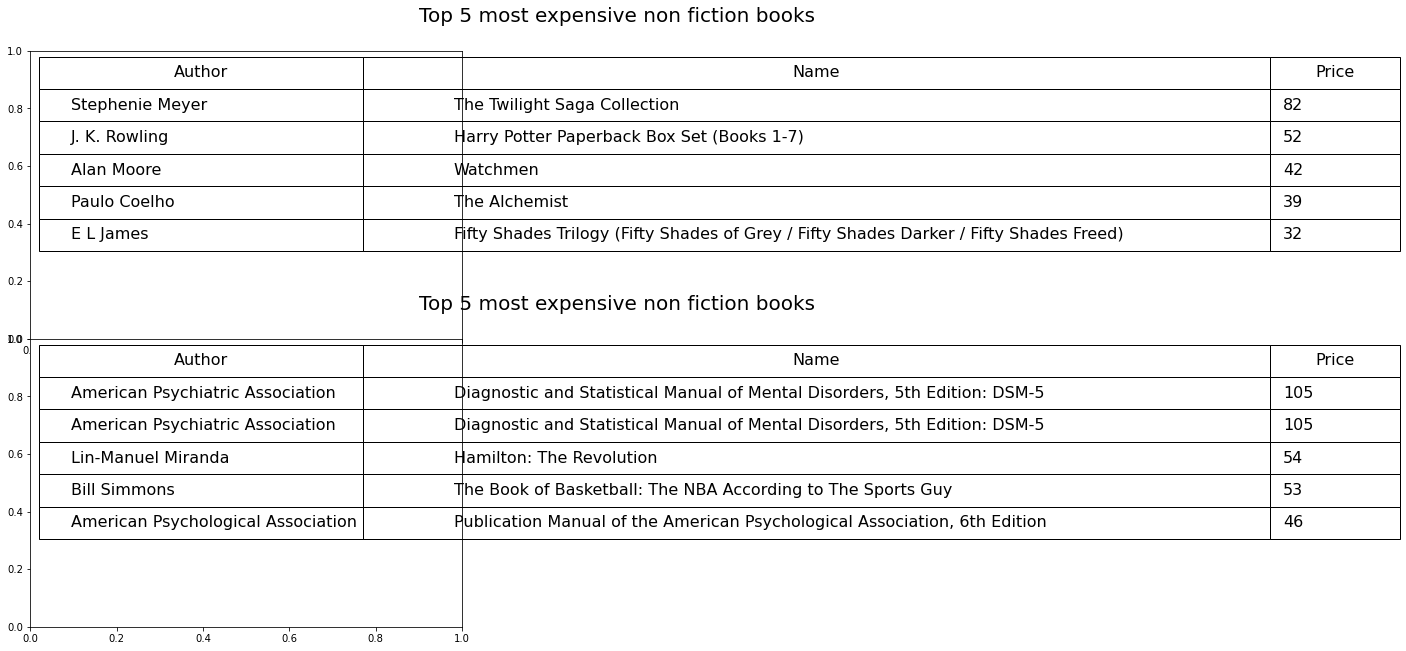

In [11]:
top_fiction = df[df['Genre']=='Fiction'].sort_values(by='Price', ascending=False).head()
top_fiction = top_fiction[['Author', 'Name', 'Price']]
top_fiction.reset_index(inplace=True)
top_fiction.drop('index', inplace=True, axis=1)
top_non_fiction = df[df['Genre']=='Non Fiction'].sort_values(by='Price', ascending=False).head()
top_non_fiction = top_non_fiction[['Author', 'Name', 'Price']]
top_non_fiction.reset_index(inplace=True)
top_non_fiction.drop('index', inplace=True, axis=1)
list_fiction=[]
for n in range(len(top_fiction['Name'])):
    x = top_fiction.loc[n,:]
    list_fiction.append(x)
list_non_fiction=[]
for n in range(len(top_non_fiction['Name'])):
    x = top_non_fiction.loc[n,:]
    list_non_fiction.append(x)
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0, -1, 1, 1]) 
table1=axes1.table(cellText = list_fiction, cellLoc ='left', loc ='upper left', colWidths=[0.5,1.4,0.2],
                  colLabels=top_fiction.columns)           
table1.auto_set_font_size(False) 
table1.set_fontsize(16)  
table1.scale(1.5, 2.7) 
axes1.text(0.9, 1.1, 'Top 5 most expensive non fiction books', color='black', fontsize=20)

table2=axes2.table(cellText = list_non_fiction, cellLoc ='left', loc ='upper left', colWidths=[0.5,1.4,0.2],
                  colLabels=top_non_fiction.columns)           
table2.auto_set_font_size(False) 
table2.set_fontsize(16)  
table2.scale(1.5, 2.7) 
axes2.text(0.9, 1.1, 'Top 5 most expensive non fiction books', color='black', fontsize=20)
plt.show()

In [12]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


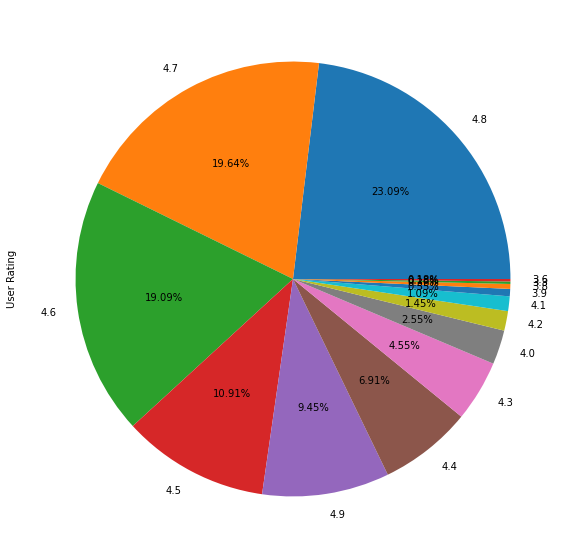

In [27]:
fig = plt.figure(figsize = (15,10))
rating = df['User Rating'].value_counts().plot.pie(autopct = '%1.2f%%')


In [31]:
Reviews = round(100*df['Reviews'].value_counts()/len(df['Reviews']),2)
Reviews

8580     1.82
5069     1.64
21834    1.45
19546    1.27
19576    1.09
         ... 
3428     0.18
14982    0.18
9867     0.18
13964    0.18
2052     0.18
Name: Reviews, Length: 346, dtype: float64